In [43]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [44]:
df = pd.read_csv('D:/aiml/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [45]:
df.shape

(150, 6)

In [46]:
df = df.drop(columns = ['Id'])
df.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [47]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [49]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [50]:
df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [51]:
colors = ['red', 'orange', 'blue']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']

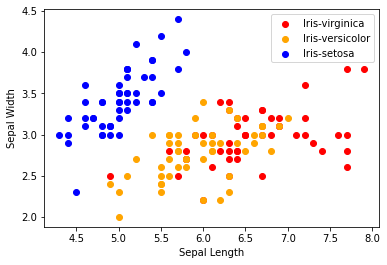

In [52]:
for i in range(3):
 x = df[df['Species'] == species[i]]
 plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

In [53]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [54]:
df['Species'] = le.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [55]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Species'])
Y = df['Species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [56]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [57]:
model.fit(x_train, y_train)

LogisticRegression()

In [58]:
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  95.55555555555556


In [59]:
from keras.models import Sequential 
from keras.layers import Dense,Activation,Dropout
from keras.utils import to_categorical

In [60]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [61]:
model=Sequential()
model.add(Dense(1000,input_dim=4))
model.add(Dense(500,activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [62]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1000)              5000      
                                                                 
 dense_13 (Dense)            (None, 500)               500500    
                                                                 
 dense_14 (Dense)            (None, 300)               150300    
                                                                 
 dropout_3 (Dropout)         (None, 300)               0         
                                                                 
 dense_15 (Dense)            (None, 3)                 903       
                                                                 
Total params: 656,703
Trainable params: 656,703
Non-trainable params: 0
_________________________________________________________________


In [63]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=20,epochs=10,verbose=1)

Epoch 1/10
6/6 [==============================] - 3s 111ms/step - loss: 0.9061 - accuracy: 0.5143 - val_loss: 0.6892 - val_accuracy: 0.6667
Epoch 2/10
6/6 [==============================] - 0s 22ms/step - loss: 0.5618 - accuracy: 0.6952 - val_loss: 0.4566 - val_accuracy: 0.6889
Epoch 3/10
6/6 [==============================] - 0s 19ms/step - loss: 0.4263 - accuracy: 0.8095 - val_loss: 0.4356 - val_accuracy: 0.7111
Epoch 4/10
6/6 [==============================] - 0s 22ms/step - loss: 0.4099 - accuracy: 0.7619 - val_loss: 0.2849 - val_accuracy: 0.9111
Epoch 5/10
6/6 [==============================] - 0s 19ms/step - loss: 0.1800 - accuracy: 0.9524 - val_loss: 0.3046 - val_accuracy: 0.8444
Epoch 6/10
6/6 [==============================] - 0s 18ms/step - loss: 0.2549 - accuracy: 0.8571 - val_loss: 0.1655 - val_accuracy: 0.9333
Epoch 7/10
6/6 [==============================] - 0s 18ms/step - loss: 0.1816 - accuracy: 0.9429 - val_loss: 0.1377 - val_accuracy: 0.9556
Epoch 8/10
6/6 [==========

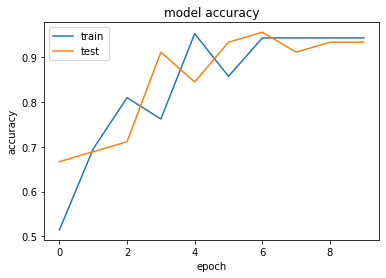

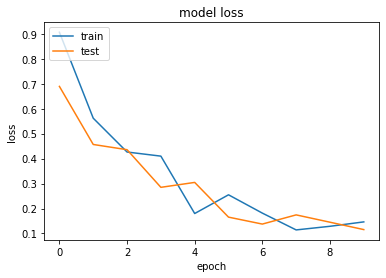

In [64]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()
